# Chi-square goodness-of-fit test

**date** : 2021-04-18

**aim** : Perform a **chi-square** goodness-of-fit test.

**reference** : N/A

## 1. Setup the notebook

In [1]:
from src import load
from scipy.stats import chisquare
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Chi-square goodness-of-fit test

**aim** : Analyse whether it is reasonable to claim that the total number of goals scored per ten minute period in a football game is unifomally distributed across all nine periods.

**data** : uniform_goal.csv

**description** : Data on the total number of goals scored per ten minute period in an English Premier League football season in normal time in season 18-19.

### 2.1 Import the data

In [2]:
# import the data
goals = load.uniform_goals()

In [3]:
# assign local vars
group = goals["group"]
obs = goals["obs"]

### 2.2 Visualise the data

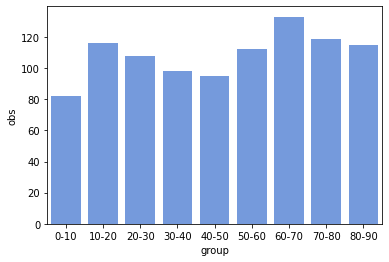

In [4]:
sns.barplot(data=goals, x="group", y="obs", color="cornflowerblue")
plt.show()

### 2.3 Perform the test

In [5]:
chisquare(f_obs=obs)

Power_divergenceResult(statistic=16.71165644171779, pvalue=0.033255616570006946)

#### 2.4 Plot the results of the test

Plot a side-by-side bar chart showing the **observed** and **expected** number of goals.

Expected number of goals is **n Pr,** here **n** is the total number of goals scored in the observatation, and **Pr** is the probability of a goals being scored in a particular group.
As the proposed distribution is a **discrete uniform,** each grouping should have the same probability of an event.
There are nine groups.

In [6]:
pr = 1/9  # probability goal is scored
n = obs.sum()  # goals scored in period

In [7]:
# add expected goals to dataframe
goals["exp"] = n*pr

In [8]:
# melt the data into long format
mgoals = goals.melt(id_vars="group", value_vars=["obs", "exp"])

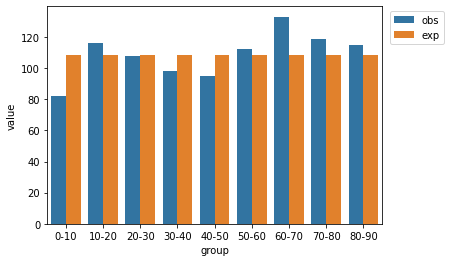

In [9]:
f, ax = plt.subplots()
ax = sns.barplot(data=mgoals, x="group", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1.20, 1))    # move legend outside axis
plt.show()

## Discussion

Give that $p \in (0.01, 0.05]$, there is moderate evidence against the null hypothesis that the distribution of goals across the 90 minutes of a football match are uniformally distributed.
There is moderate evidence to support the claim that the total number of goals scored per ten minute period in an EPL football game are not uniformally distributed.